<a href="https://colab.research.google.com/github/thinkaboutcode/cheatsheets/blob/main/python_data_cheatsheet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Numpy

In [ ]:
import numpy as np

# 1D array
arr1 = np.array([1, 2, 3, 4])
print(arr1)

# 2D array
arr2 = np.array([[1, 2, 3], [4, 5, 6], [3, 4, 5]])
print(arr2)

arr3 = np.array([[[1, 2, 3], [4, 5, 6]], [[1, 2, 3], [1, 2, 3]]])
print(arr3)

[1 2 3 4]
[[1 2 3]
 [4 5 6]
 [3 4 5]]
[[[1 2 3]
  [4 5 6]]

 [[1 2 3]
  [1 2 3]]]


In [ ]:
a1_size = arr1.size
a1_shape = arr1.shape
print(a1_size)
print(a1_shape)

a2_size = arr2.size
a2_shape = arr2.shape
print(a2_size)
print(a2_shape)

a3_size = arr3.size
a3_shape = arr3.shape
print(a3_size)
print(a3_shape)




4
(4,)
9
(3, 3)
12
(2, 2, 3)


In [ ]:
print(arr3[0].shape)
print(arr3[0])
print(arr3[1].shape)
print(arr3[1])

(2, 3)
[[1 2 3]
 [4 5 6]]
(2, 3)
[[1 2 3]
 [1 2 3]]


# Pandas

In [ ]:
import pandas as pd

# From a dictionary
data = {'Name': ['John', 'Anna', 'Peter', 'Linda'],
        'Age': [28, 24, 35, 32],
        'City': ['New York', 'Paris', 'Berlin', 'London']}
df = pd.DataFrame(data)

print(df)
print(df.shape)


    Name  Age      City
0   John   28  New York
1   Anna   24     Paris
2  Peter   35    Berlin
3  Linda   32    London
(4, 3)


## Loading from file

In [ ]:
#df = pd.read_csv('your_file.csv')

## Viewing Data

In [ ]:
print("head")
print(df.head())  # Shows the first 5 rows
print()

print("head for first 2")
print(df.head(2))  # Shows the first 3 rows
print()

print("tail last 5")
print(df.tail())  # Shows the last 5 rows
print()

print("info")
print(df.info())  # Displays info about columns, data types, and non-null counts
print()

print("describe")
print(df.describe())  # Provides summary statistics for numerical columns
print()

head
    Name  Age      City
0   John   28  New York
1   Anna   24     Paris
2  Peter   35    Berlin
3  Linda   32    London

head for first 2
   Name  Age      City
0  John   28  New York
1  Anna   24     Paris

tail last 5
    Name  Age      City
0   John   28  New York
1   Anna   24     Paris
2  Peter   35    Berlin
3  Linda   32    London

info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    4 non-null      object
 1   Age     4 non-null      int64 
 2   City    4 non-null      object
dtypes: int64(1), object(2)
memory usage: 224.0+ bytes
None

describe
             Age
count   4.000000
mean   29.750000
std     4.787136
min    24.000000
25%    27.000000
50%    30.000000
75%    32.750000
max    35.000000



## Accessing Columns and Rows

In [ ]:
print(df.head)
print(df['Name'])  # Access the 'Name' column
print(df[['Name', 'Age']])  # Access 'Name' and 'Age' columns
print(df.iloc[0])  # Access the first row using its index
print(df[df['Age'] > 30])  # Access rows where 'Age' is greater than 30


<bound method NDFrame.head of     Name  Age      City
0   John   28  New York
1   Anna   24     Paris
2  Peter   35    Berlin
3  Linda   32    London>
0     John
1     Anna
2    Peter
3    Linda
Name: Name, dtype: object
    Name  Age
0   John   28
1   Anna   24
2  Peter   35
3  Linda   32
Name        John
Age           28
City    New York
Name: 0, dtype: object
    Name  Age    City
2  Peter   35  Berlin
3  Linda   32  London


## Modifying Data

In [ ]:
df['Salary'] = [50000, 60000, 70000, 80000]  # Add a 'Salary' column
print(df)
df['Age'] = df['Age'] + 1  # Add 1 to every value in the 'Age' column
df.rename(columns={'Name': 'Full Name', 'Age': 'Years'}, inplace=True)
print(df)
#df.drop('City', axis=1, inplace=True)  # Drop the 'City' column
print(df)


    Name  Age      City  Salary
0   John   28  New York   50000
1   Anna   24     Paris   60000
2  Peter   35    Berlin   70000
3  Linda   32    London   80000
  Full Name  Years      City  Salary
0      John     29  New York   50000
1      Anna     25     Paris   60000
2     Peter     36    Berlin   70000
3     Linda     33    London   80000
  Full Name  Years      City  Salary
0      John     29  New York   50000
1      Anna     25     Paris   60000
2     Peter     36    Berlin   70000
3     Linda     33    London   80000


## Filtering Data

In [ ]:
adults = df[df['Years'] > 30]  # Get rows where Age is greater than 30
print(adults)
result = df[(df['Years'] > 30) & (df['City'] == 'Chicago')]  # Rows with Age > 30 and City = Chicago
print(result)


  Full Name  Years    City  Salary
2     Peter     36  Berlin   70000
3     Linda     33  London   80000
Empty DataFrame
Columns: [Full Name, Years, City, Salary]
Index: []


## Grouping and Aggregating Data

In [ ]:
group_by_city = df[['City', 'Years']].groupby('City').mean()  # Group by 'City' and get the average age
print(group_by_city)
agg_data = df[['City', 'Years', 'Salary']].groupby('City').agg({'Years': 'mean', 'Salary': 'sum'})  # Group by City and apply multiple aggregations
print(agg_data)


          Years
City           
Berlin     36.0
London     33.0
New York   29.0
Paris      25.0
          Years  Salary
City                   
Berlin     36.0   70000
London     33.0   80000
New York   29.0   50000
Paris      25.0   60000


## Sorting Data

In [ ]:
sorted_df = df.sort_values('Years')  # Sort the DataFrame by the 'Age' column
print(sorted_df)
sorted_df = df.sort_values(['City', 'Years'], ascending=[True, False])  # Sort by 'City' and then by 'Age' descending
print(sorted_df)


  Full Name  Years      City  Salary
1      Anna     25     Paris   60000
0      John     29  New York   50000
3     Linda     33    London   80000
2     Peter     36    Berlin   70000
  Full Name  Years      City  Salary
2     Peter     36    Berlin   70000
3     Linda     33    London   80000
0      John     29  New York   50000
1      Anna     25     Paris   60000


## Saving Data

In [ ]:
# df.to_csv('output.csv', index=False)  # Save the DataFrame to a CSV file without the index column

## Handling Missing Data

In [ ]:
print(df.isnull())  # Returns a DataFrame of booleans indicating missing values
df['Years'].fillna(df['Years'].mean(), inplace=True)  # Fill missing values in 'Age' with the mean
df.dropna(inplace=True)  # Drop rows with any missing values


   Full Name  Years   City  Salary
0      False  False  False   False
1      False  False  False   False
2      False  False  False   False
3      False  False  False   False


# Matplotlib

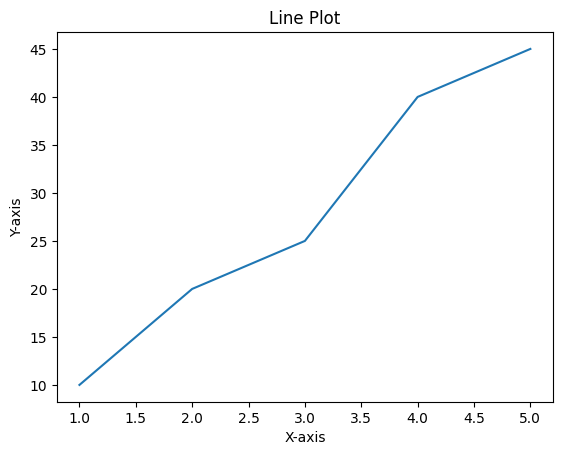

In [ ]:
import matplotlib.pyplot as plt

x = [1, 2, 3, 4, 5]
y = [10, 20, 25, 40, 45]

plt.plot(x, y)
plt.title("Line Plot")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.show()


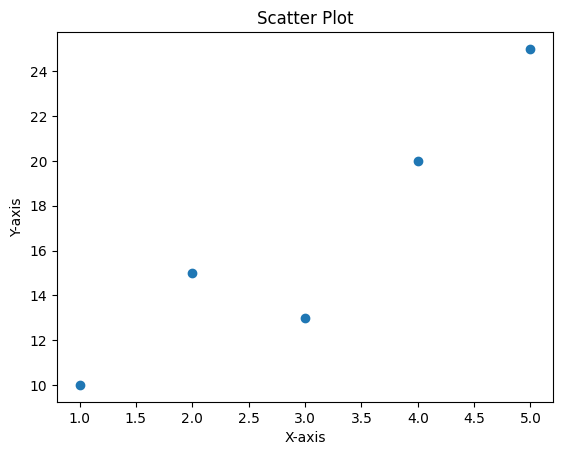

In [ ]:
x = [1, 2, 3, 4, 5]
y = [10, 15, 13, 20, 25]

plt.scatter(x, y)
plt.title("Scatter Plot")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.show()


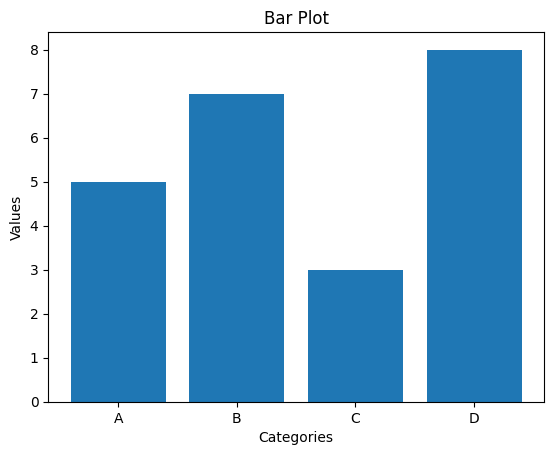

In [ ]:
categories = ['A', 'B', 'C', 'D']
values = [5, 7, 3, 8]

plt.bar(categories, values)
plt.title("Bar Plot")
plt.xlabel("Categories")
plt.ylabel("Values")
plt.show()


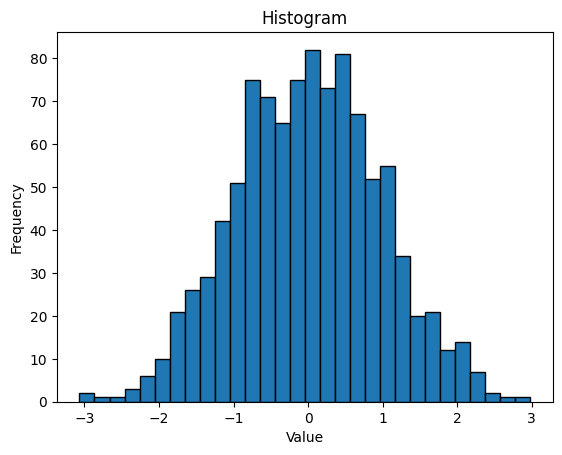

In [ ]:
import numpy as np

data = np.random.randn(1000)
plt.hist(data, bins=30, edgecolor='black')
plt.title("Histogram")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()


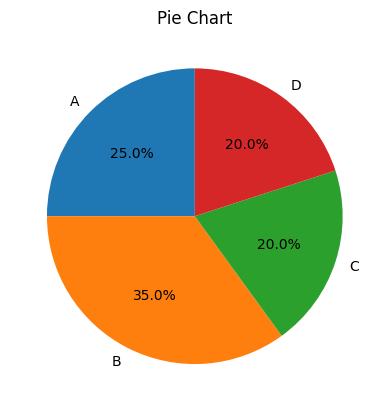

In [ ]:
labels = ['A', 'B', 'C', 'D']
sizes = [25, 35, 20, 20]

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title("Pie Chart")
plt.show()


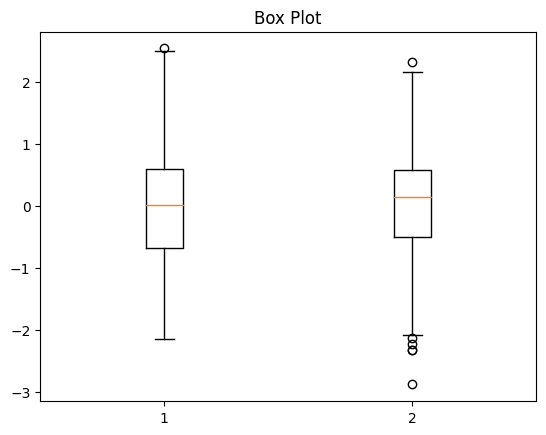

In [ ]:
data = [np.random.randn(100), np.random.randn(100)]
plt.boxplot(data)
plt.title("Box Plot")
plt.show()


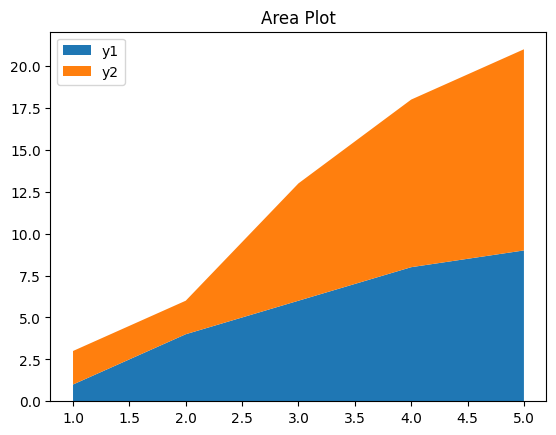

In [ ]:
x = [1, 2, 3, 4, 5]
y1 = [1, 4, 6, 8, 9]
y2 = [2, 2, 7, 10, 12]

plt.stackplot(x, y1, y2, labels=['y1', 'y2'])
plt.legend(loc='upper left')
plt.title("Area Plot")
plt.show()


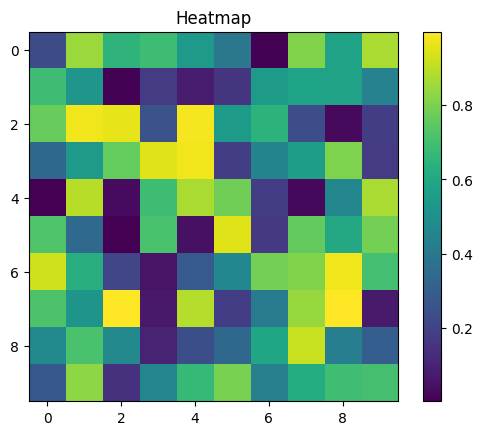

In [ ]:
matrix = np.random.random((10, 10))
plt.imshow(matrix, cmap='viridis', interpolation='nearest')
plt.colorbar()  # Add color bar to show the scale
plt.title("Heatmap")
plt.show()


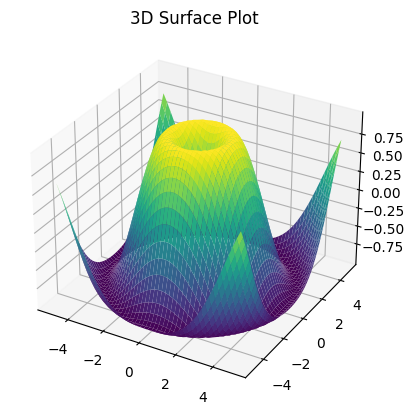

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

x = np.linspace(-5, 5, 50)
y = np.linspace(-5, 5, 50)
x, y = np.meshgrid(x, y)
z = np.sin(np.sqrt(x**2 + y**2))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z, cmap='viridis')
plt.title("3D Surface Plot")
plt.show()


# Seaborn



## Correlation Map

     A    B    C    D
A  1.0 -1.0  1.0  0.3
B -1.0  1.0 -1.0 -0.3
C  1.0 -1.0  1.0  0.3
D  0.3 -0.3  0.3  1.0


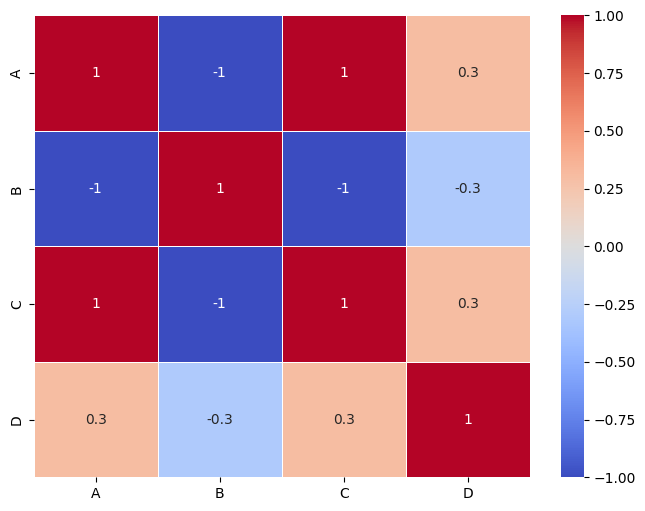

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Example dataset
data = {
    'A': [1, 2, 3, 4, 5],
    'B': [5, 4, 3, 2, 1],
    'C': [2, 3, 4, 5, 6],
    'D': [5, 3, 2, 4, 6]
}

df = pd.DataFrame(data)
# Generate the correlation matrix
# Generate the correlation matrix
corr_matrix = df.corr()
print(corr_matrix)

# Create the heatmap using seaborn
plt.figure(figsize=(8, 6))  # Set the figure size
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Display the heatmap
plt.show()



## Scatter Plot

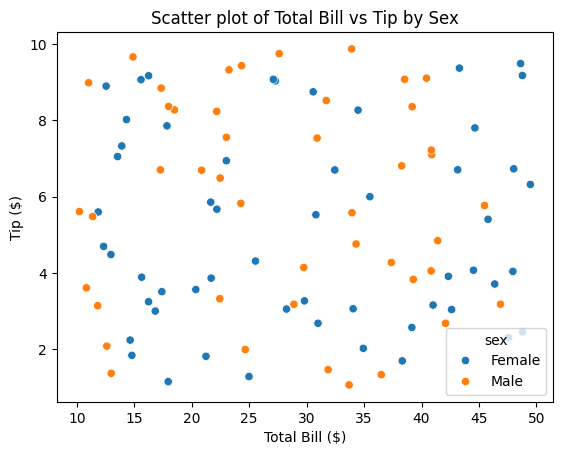

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Set seed for reproducibility
np.random.seed(42)

# Create a DataFrame with random data for scatter plot
n = 100  # Number of data points
data = {
    'total_bill': np.random.uniform(10, 50, n),  # Random total bills between 10 and 50
    'tip': np.random.uniform(1, 10, n),          # Random tips between 1 and 10
    'sex': np.random.choice(['Male', 'Female'], n)  # Randomly assign sex
}

df = pd.DataFrame(data)

# Scatter plot
sns.scatterplot(x='total_bill', y='tip', data=df, hue='sex')

# Show the plot
plt.title('Scatter plot of Total Bill vs Tip by Sex')
plt.xlabel('Total Bill ($)')
plt.ylabel('Tip ($)')
plt.show()